In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
df = pd.read_csv("/content/AAPL.csv")

In [6]:
df_filtered = df[(df['Date'] >= '2018-08-15') & (df['Date'] < '2019-08-15')]
df_reindexed = df_filtered.reset_index(drop=True)
df_reindexed.to_csv('/content/AAPL.csv', index=False)

In [7]:
df_reindexed.shape

(251, 7)

In [20]:
df_reindexed.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-15,52.305000,52.685001,52.082500,52.560001,50.707451,115230400
2018-08-16,52.937500,53.452499,52.867500,53.330002,51.450306,114001600
2018-08-17,53.360001,54.487499,53.290001,54.395000,52.477779,141708000
2018-08-20,54.525002,54.794998,53.777500,53.865002,51.966450,121150800
2018-08-21,54.200001,54.297501,53.507500,53.759998,51.865139,104639200


**2. Data Preprocessing**

In [13]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [15]:
#Converting the "Date" column into "datetime" data type
df["Date"] = pd.to_datetime(df['Date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [17]:
df.set_index("Date", inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-15,52.305000,52.685001,52.082500,52.560001,50.707451,115230400
2018-08-16,52.937500,53.452499,52.867500,53.330002,51.450306,114001600
2018-08-17,53.360001,54.487499,53.290001,54.395000,52.477779,141708000
2018-08-20,54.525002,54.794998,53.777500,53.865002,51.966450,121150800
2018-08-21,54.200001,54.297501,53.507500,53.759998,51.865139,104639200


In [21]:
df.sort_index(inplace = True)

In [26]:
scaler = MinMaxScaler()
scaler_values = scaler.fit_transform(df[df.columns])

In [27]:
scaler_values

array([[0.75161291, 0.74096871, 0.7556391 , 0.75712057, 0.75577248,
        0.20552114],
       [0.78076038, 0.77595437, 0.79141034, 0.79138853, 0.79023035,
        0.20190211],
       [0.80023047, 0.82313386, 0.81066307, 0.83878496, 0.83789043,
        0.28350221],
       ...,
       [0.6410138 , 0.64193737, 0.65105938, 0.64853126, 0.68138518,
        0.13100005],
       [0.65714292, 0.75692308, 0.66621094, 0.74299058, 0.77784263,
        0.42241417],
       [0.6817973 , 0.69196586, 0.6902483 , 0.6737872 , 0.70717527,
        0.29670129]])

In [28]:
df_scaled = pd.DataFrame(scaler_values, columns = df.columns, index = df.index)

In [29]:
df_scaled.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-15,0.751613,0.740969,0.755639,0.757121,0.755772,0.205521
2018-08-16,0.780760,0.775954,0.791410,0.791389,0.790230,0.201902
2018-08-17,0.800230,0.823134,0.810663,0.838785,0.837890,0.283502
2018-08-20,0.853917,0.837151,0.832878,0.815198,0.814172,0.222958
2018-08-21,0.838940,0.814473,0.820574,0.810525,0.809473,0.174328


**3. Plotting the columns**

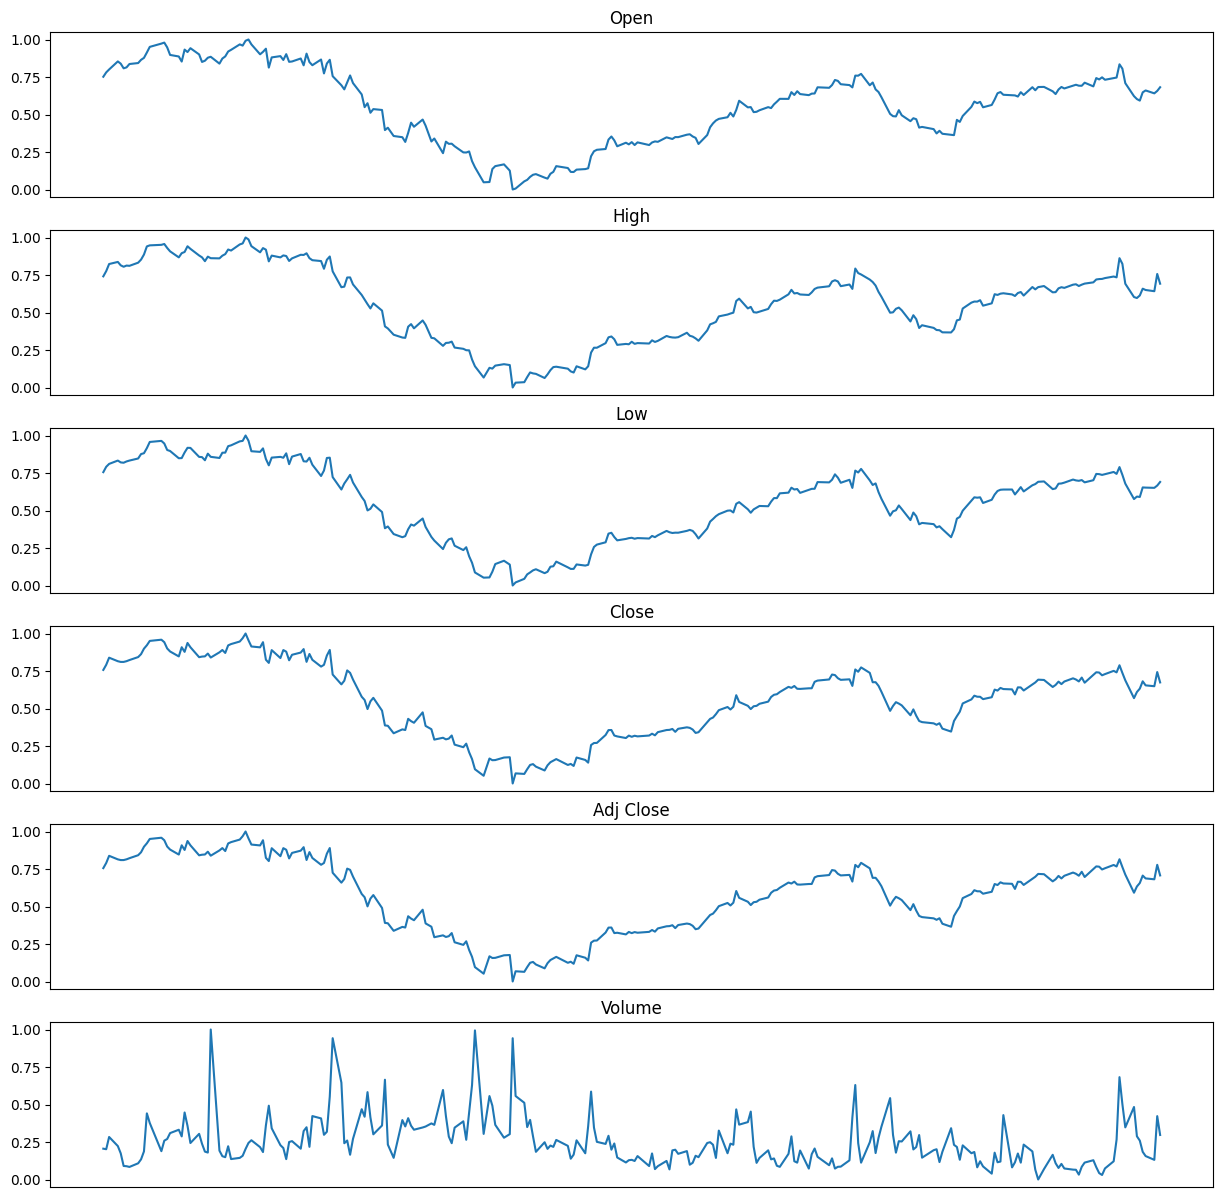

In [32]:
plt.rcParams['figure.figsize'] = (15, 15)
figure, axes = plt.subplots(6)

for ax, col in zip(axes, df_scaled.columns):
  ax.plot(df_scaled[col])
  ax.set_title(col)
  ax.axes.xaxis.set_visible(False)


**4. Creating the sliding window sequences**

In [34]:
def create_sequence(data, window_size):
  X_vals = []
  y_vals = []
  for i in range(window_size, len(data)):
    X_vals.append(data.iloc[i-window_size:i].values)
    y_vals.append(data.iloc[i].values)
  return np.array(X_vals), np.array(y_vals)

In [35]:
window_size = 60
X_vals, y_vals = create_sequence(df_scaled, window_size)

In [36]:
X_vals.shape, y_vals.shape

((191, 60, 6), (191, 6))

In [37]:
X_vals

array([[[0.75161291, 0.74096871, 0.7556391 , 0.75712057, 0.75577248,
         0.20552114],
        [0.78076038, 0.77595437, 0.79141034, 0.79138853, 0.79023035,
         0.20190211],
        [0.80023047, 0.82313386, 0.81066307, 0.83878496, 0.83789043,
         0.28350221],
        ...,
        [0.69493094, 0.66860399, 0.63989519, 0.66088106, 0.65899864,
         0.64560162],
        [0.66751154, 0.67236467, 0.67999549, 0.68513571, 0.68338802,
         0.24175028],
        [0.71417052, 0.73321933, 0.70779225, 0.75389396, 0.75252799,
         0.25991021]],

       [[0.78076038, 0.77595437, 0.79141034, 0.79138853, 0.79023035,
         0.20190211],
        [0.80023047, 0.82313386, 0.81066307, 0.83878496, 0.83789043,
         0.28350221],
        [0.85391715, 0.83715091, 0.83287765, 0.81519805, 0.81417206,
         0.22295773],
        ...,
        [0.66751154, 0.67236467, 0.67999549, 0.68513571, 0.68338802,
         0.24175028],
        [0.71417052, 0.73321933, 0.70779225, 0.75389396, 0.752

**5. Train - Test Split**

In [40]:
X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(X_vals, y_vals, test_size = 0.2 , random_state = 42)
X_val_train.shape, X_val_test.shape

((152, 60, 6), (39, 60, 6))

**6. Building the LSTM Model**

In [62]:
lstm_model = keras.Sequential([
    keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (X_val_train.shape[1], X_val_train.shape[2])),
    keras.layers.Dropout(0.3),

    keras.layers.LSTM(units = 50, return_sequences = True),
    keras.layers.Dropout(0.3),

    keras.layers.LSTM(units = 50, return_sequences = False),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(y_val_train.shape[1])

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
lstm_model.compile(optimizer = "adam",
                   loss = "mean_squared_error",
                   metrics = ["RootMeanSquaredError"])

In [70]:
early_stopping = EarlyStopping(monitor = "val_loss",
                               patience = 10,
                               restore_best_weights = True)

lstm_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                       │ (None, 60, 50)              │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             306 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 156,320 (610.63 KB)

 Trainable params: 52,106 (203.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 104,214 (407.09 KB)

In [65]:
lstm_model_full = lstm_model.fit(X_val_train, y_val_train,
                                 validation_split = 0.2,
                                 epochs = 100,
                                 batch_size = 3,
                                 callbacks = [early_stopping])

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - RootMeanSquaredError: 0.3144 - loss: 0.1040 - val_RootMeanSquaredError: 0.1249 - val_loss: 0.0156
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - RootMeanSquaredError: 0.1772 - loss: 0.0315 - val_RootMeanSquaredError: 0.1234 - val_loss: 0.0152
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - RootMeanSquaredError: 0.1573 - loss: 0.0248 - val_RootMeanSquaredError: 0.1145 - val_loss: 0.0131
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - RootMeanSquaredError: 0.1422 - loss: 0.0203 - val_RootMeanSquaredError: 0.0947 - val_loss: 0.0090
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - RootMeanSquaredError: 0.1182 - loss: 0.0141 - val_RootMeanSquaredError: 0.0915 - val_loss: 0.0084
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - RootMeanSquaredError: 0.1258 - loss: 0.0161 - val_RootMeanSquaredError: 0.0875 - val_loss: 0.0077
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - RootMeanSquaredError: 0.1329 - los

In [67]:
lstm_model_full.history

{'RootMeanSquaredError': [0.2463756501674652,
  0.16507989168167114,
  0.15723374485969543,
  0.13808982074260712,
  0.1290515810251236,
  0.12644721567630768,
  0.12512610852718353,
  0.1199456974864006,
  0.12014902383089066,
  0.11232045292854309,
  0.1174592450261116,
  0.116592638194561,
  0.1114250048995018,
  0.11101876199245453,
  0.11979760229587555,
  0.11101683229207993,
  0.11128349602222443],
 'loss': [0.06070095673203468,
  0.027251368388533592,
  0.024722451344132423,
  0.019068798050284386,
  0.01665431074798107,
  0.015988897532224655,
  0.015656542032957077,
  0.014386969618499279,
  0.014435788616538048,
  0.012615884654223919,
  0.013796675018966198,
  0.013593843206763268,
  0.01241553109139204,
  0.012325165793299675,
  0.014351465739309788,
  0.012324736453592777,
  0.012384016998112202],
 'val_RootMeanSquaredError': [0.12487868964672089,
  0.12336140125989914,
  0.11447428911924362,
  0.09466616064310074,
  0.09150750190019608,
  0.08752627670764923,
  0.0821698

In [68]:
predictions = lstm_model.predict(X_val_train)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step


**7. Forecasting the Data**

In [73]:
predictions[:10]

array([[3.91031418e+01, 3.94586792e+01, 3.83955765e+01, 3.87631226e+01,
        3.82317314e+01, 1.69899760e+08],
       [4.78077583e+01, 4.82094078e+01, 4.72096596e+01, 4.75143967e+01,
        4.68554649e+01, 1.30186624e+08],
       [4.10044899e+01, 4.13199730e+01, 4.03614578e+01, 4.06523514e+01,
        3.98766518e+01, 1.25745632e+08],
       [4.64083290e+01, 4.67591438e+01, 4.57217789e+01, 4.62527771e+01,
        4.56311302e+01, 1.48234880e+08],
       [4.62104950e+01, 4.64562454e+01, 4.54695549e+01, 4.58667679e+01,
        4.52332954e+01, 1.17683632e+08],
       [4.71885300e+01, 4.75597763e+01, 4.64765968e+01, 4.68642197e+01,
        4.61832275e+01, 1.32103792e+08],
       [4.21031647e+01, 4.24998512e+01, 4.14854774e+01, 4.18137589e+01,
        4.12502975e+01, 1.54874528e+08],
       [4.56141014e+01, 4.60290146e+01, 4.49915848e+01, 4.54202957e+01,
        4.48378105e+01, 1.39214064e+08],
       [3.97936058e+01, 4.02056694e+01, 3.92675285e+01, 3.94757957e+01,
        3.87314072e+01, 

In [71]:
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_val_test)

In [72]:
predictions[:10]

array([[3.91031418e+01, 3.94586792e+01, 3.83955765e+01, 3.87631226e+01,
        3.82317314e+01, 1.69899760e+08],
       [4.78077583e+01, 4.82094078e+01, 4.72096596e+01, 4.75143967e+01,
        4.68554649e+01, 1.30186624e+08],
       [4.10044899e+01, 4.13199730e+01, 4.03614578e+01, 4.06523514e+01,
        3.98766518e+01, 1.25745632e+08],
       [4.64083290e+01, 4.67591438e+01, 4.57217789e+01, 4.62527771e+01,
        4.56311302e+01, 1.48234880e+08],
       [4.62104950e+01, 4.64562454e+01, 4.54695549e+01, 4.58667679e+01,
        4.52332954e+01, 1.17683632e+08],
       [4.71885300e+01, 4.75597763e+01, 4.64765968e+01, 4.68642197e+01,
        4.61832275e+01, 1.32103792e+08],
       [4.21031647e+01, 4.24998512e+01, 4.14854774e+01, 4.18137589e+01,
        4.12502975e+01, 1.54874528e+08],
       [4.56141014e+01, 4.60290146e+01, 4.49915848e+01, 4.54202957e+01,
        4.48378105e+01, 1.39214064e+08],
       [3.97936058e+01, 4.02056694e+01, 3.92675285e+01, 3.94757957e+01,
        3.87314072e+01, 

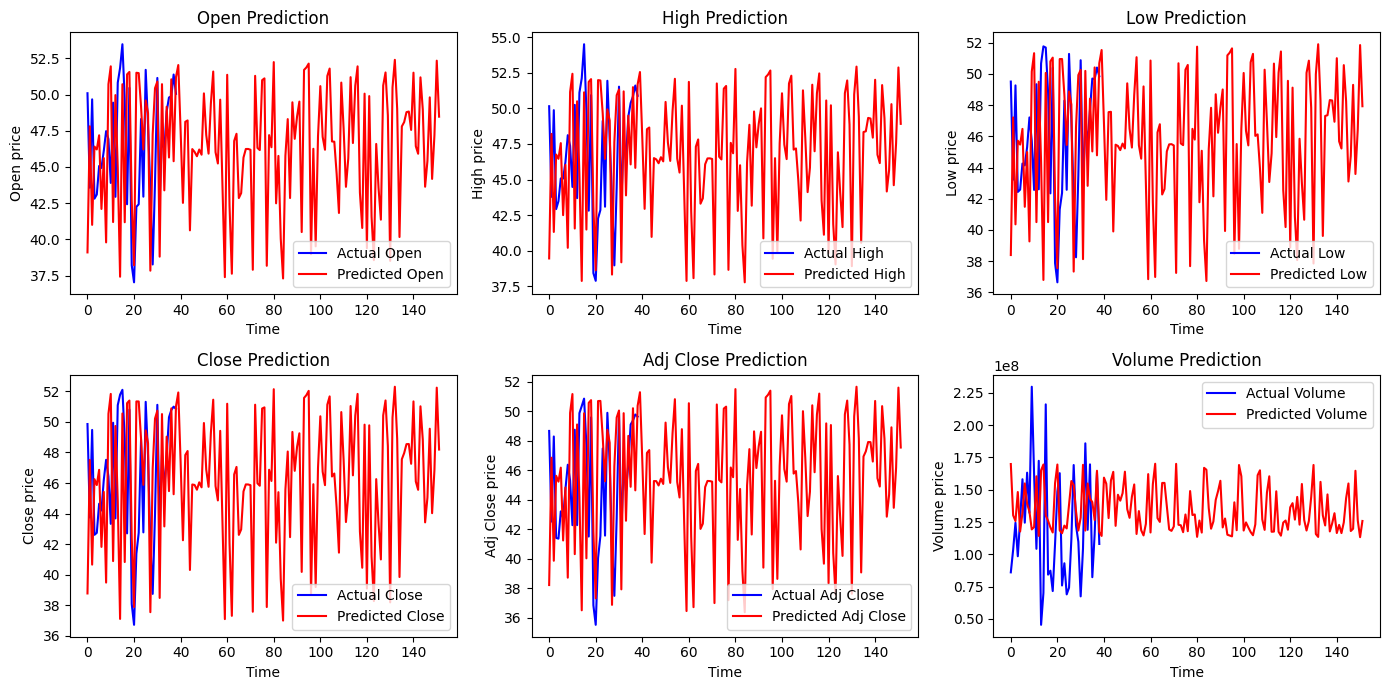

In [78]:
plt.figure(figsize = (14,7))

for i, col in enumerate(df_scaled.columns):
  plt.subplot(2, 3, i + 1)
  plt.plot(y_test_rescaled[:, i], color = "blue", label = "Actual {:}".format(col))
  plt.plot(predictions[:, i], color = "red", label = "Predicted {:}".format(col))
  plt.title("{:} Prediction".format(col))
  plt.xlabel("Time")
  plt.ylabel("{:} price".format(col))
  plt.legend()

plt.tight_layout()